In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

In [6]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<AxesSubplot:xlabel='Signal', ylabel='Density'>

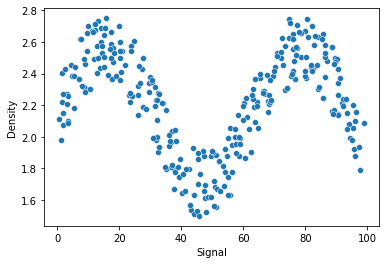

In [7]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_preds = lr_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [19]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

<AxesSubplot:xlabel='Signal', ylabel='Density'>

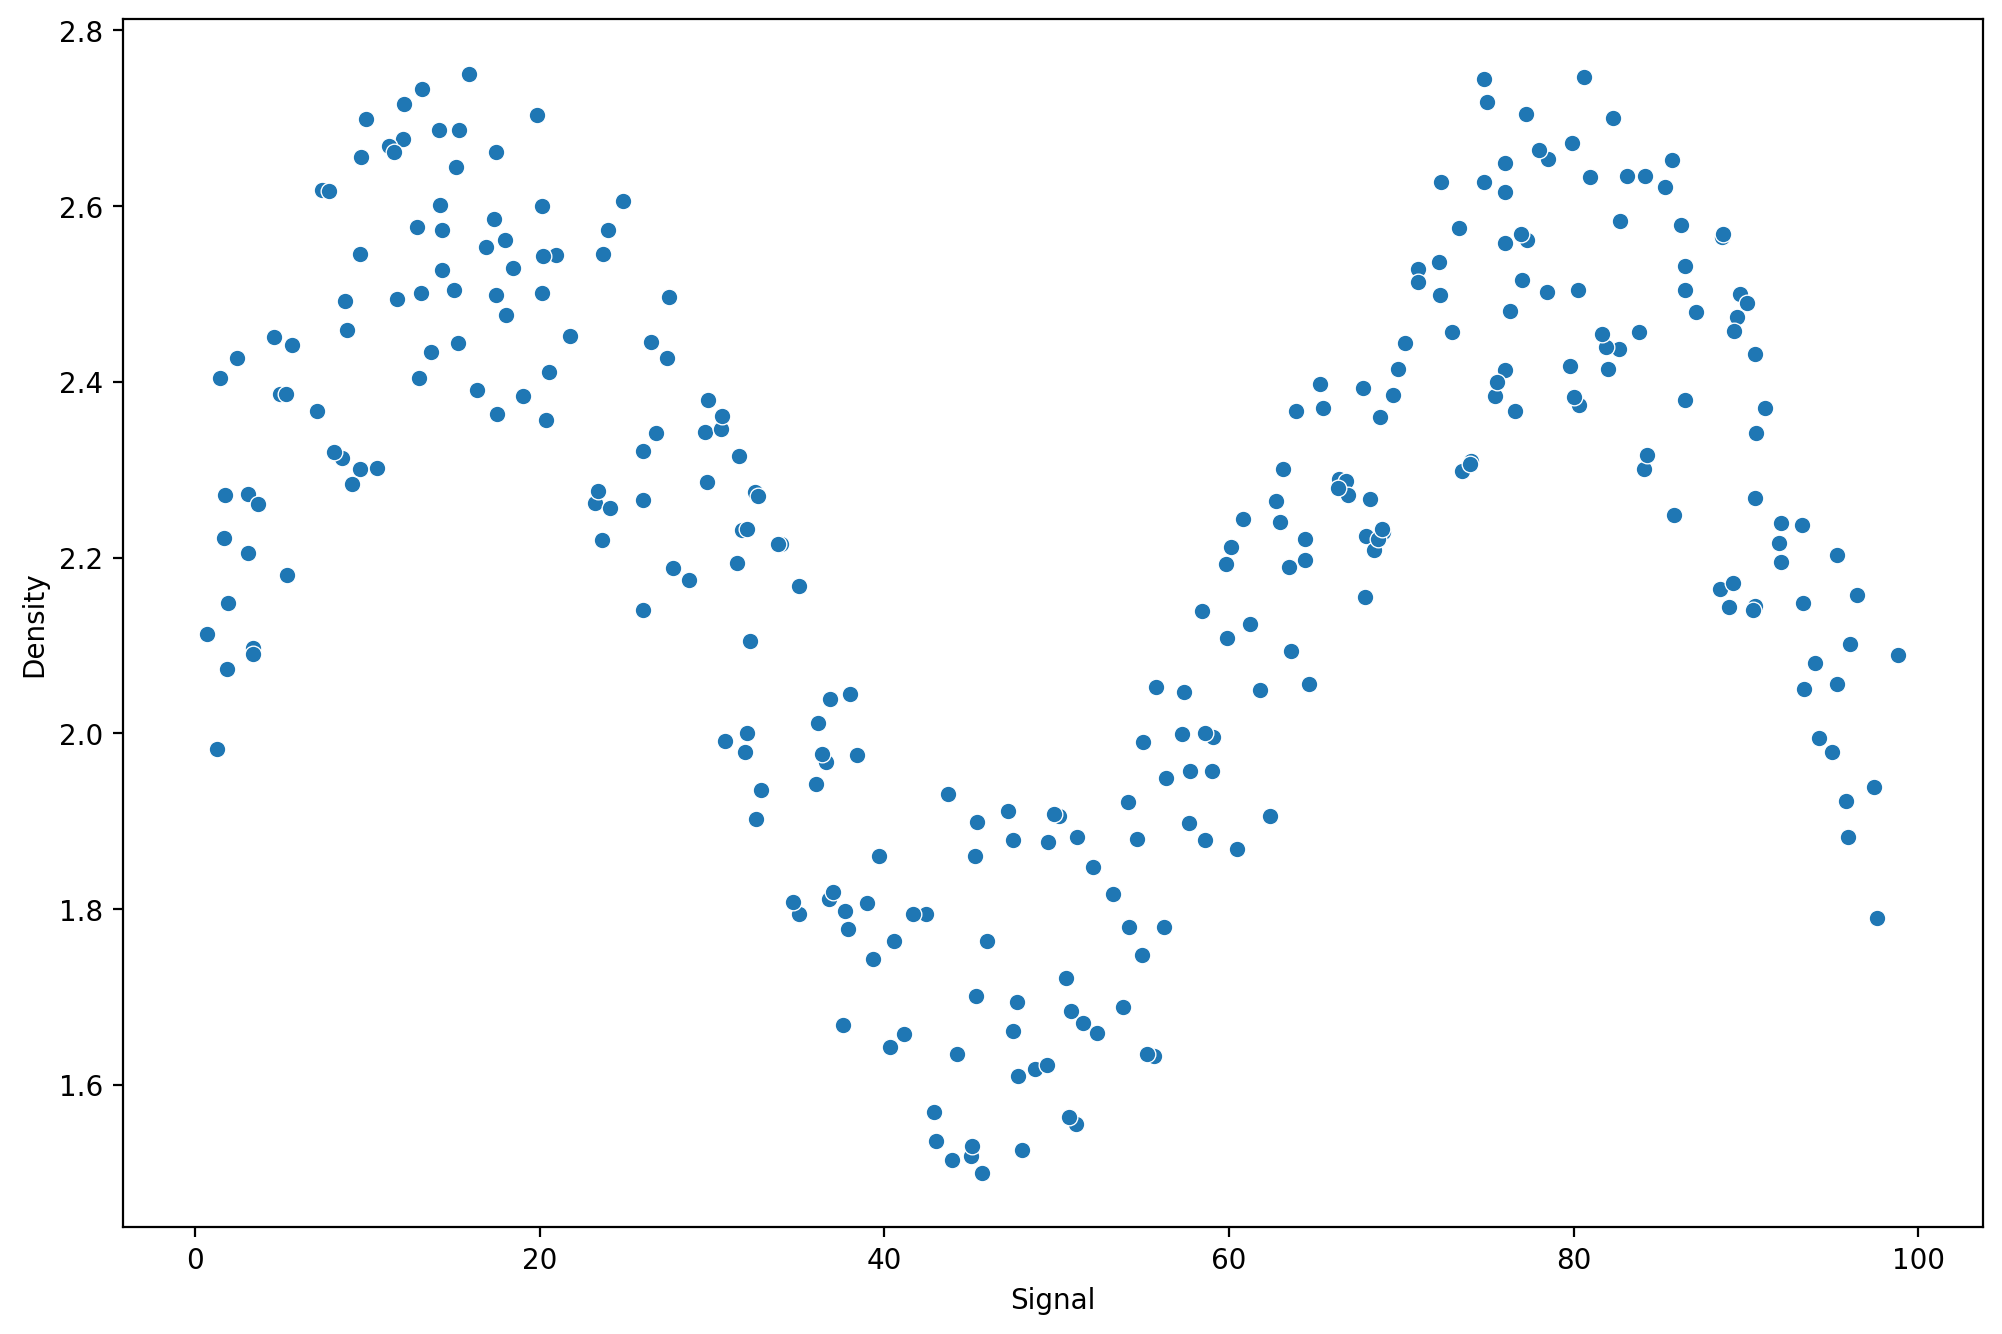

In [29]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

In [20]:
signal_range = np.arange(0, 100)

In [21]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

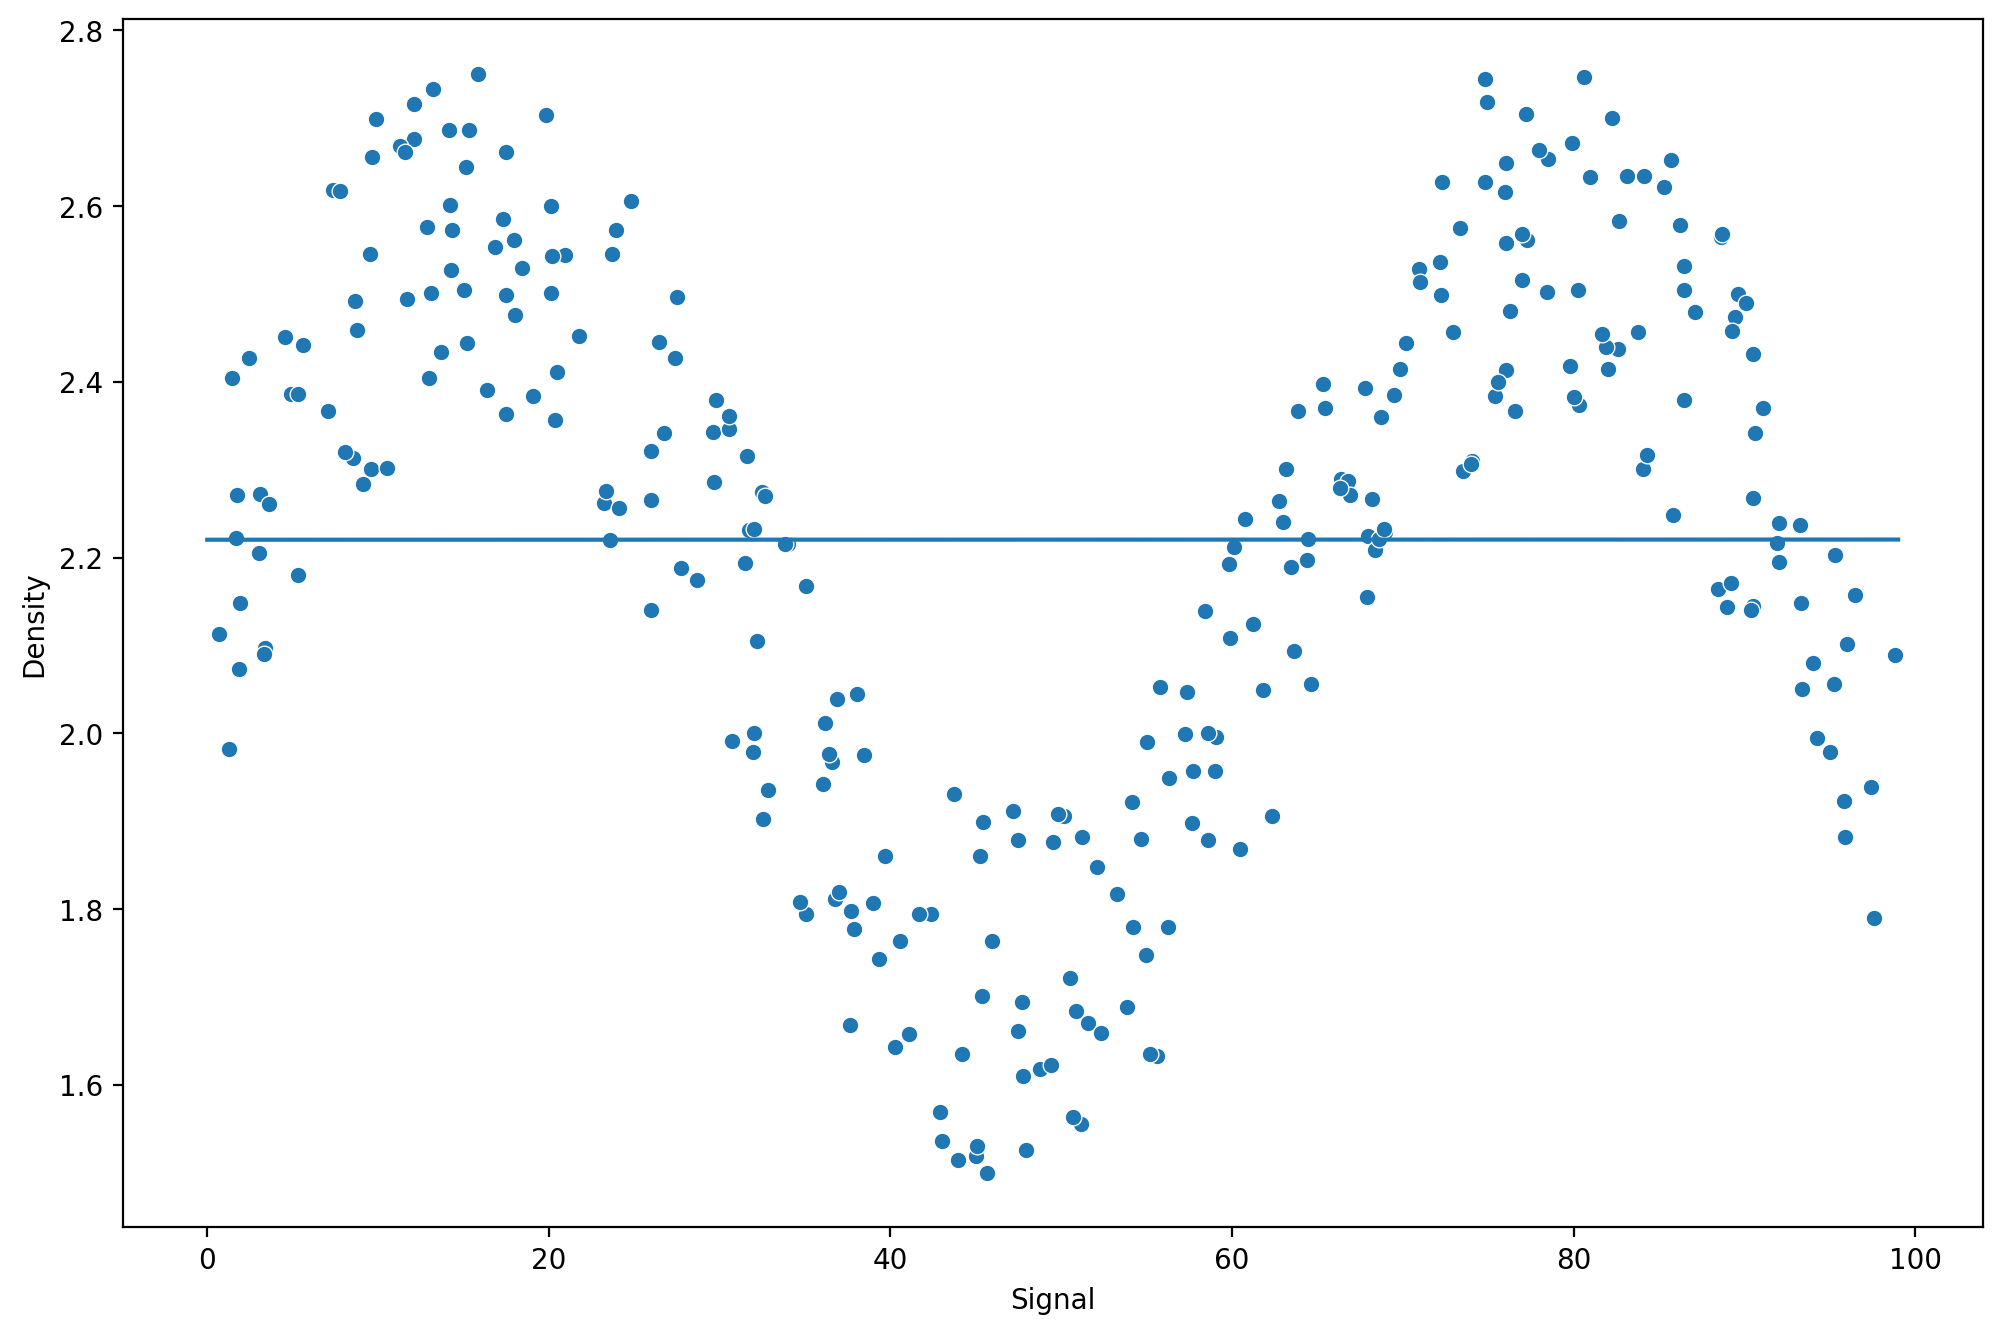

In [22]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)
plt.plot(signal_range, signal_preds)

In [23]:
def run_model(model, X_train, y_train, X_test, y_test):
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    #GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds=model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    
    plt.plot(signal_range, signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


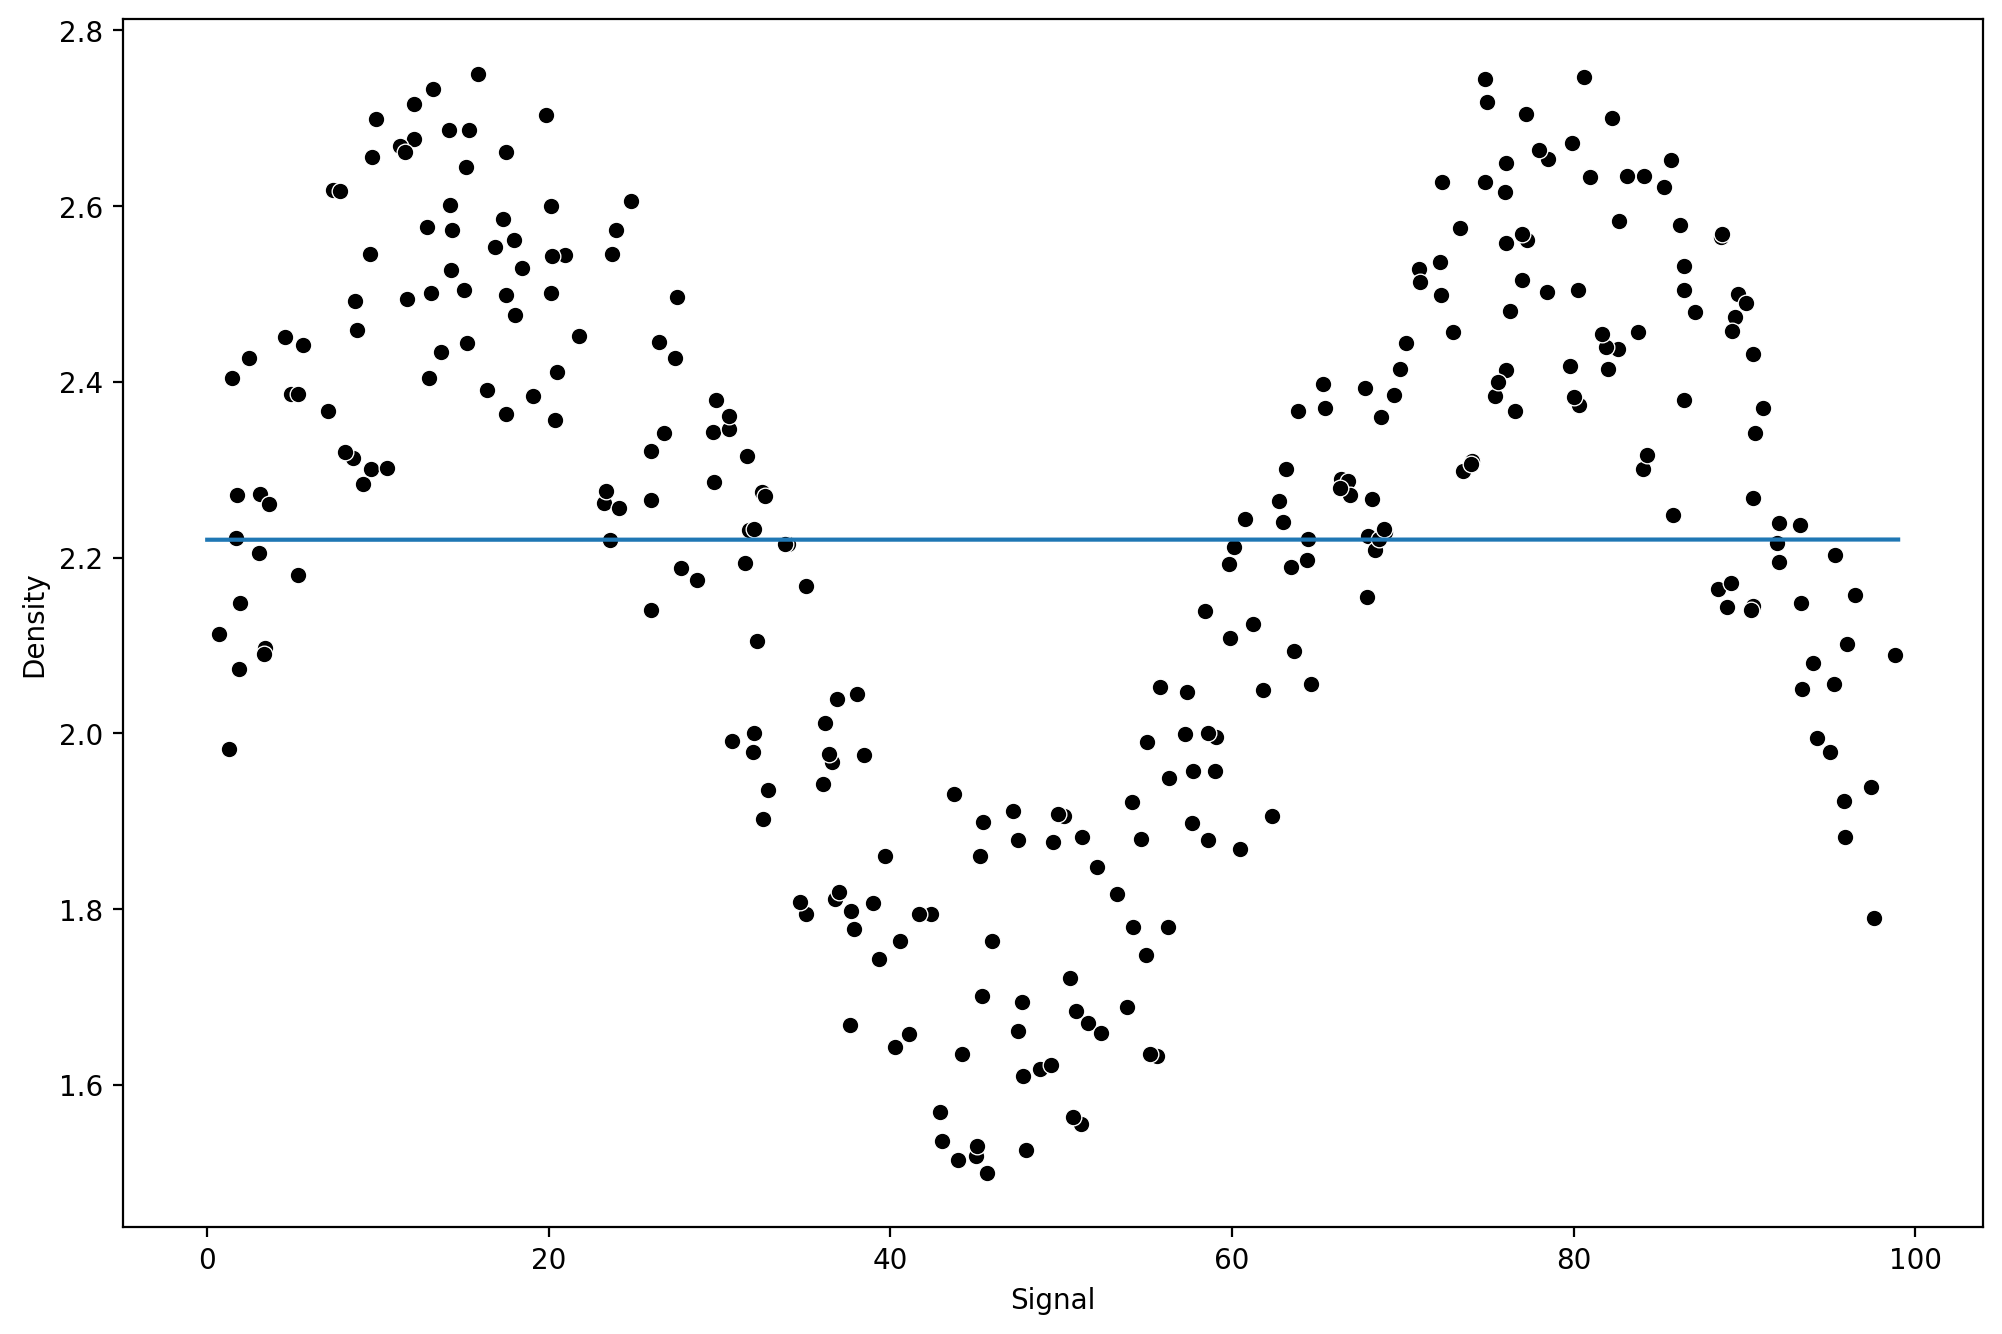

In [27]:
# LINEAR REGRESSION MODEL
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# POLYNOMIAL REGRESSION
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969104973085308
RMSE: 0.13807414122297


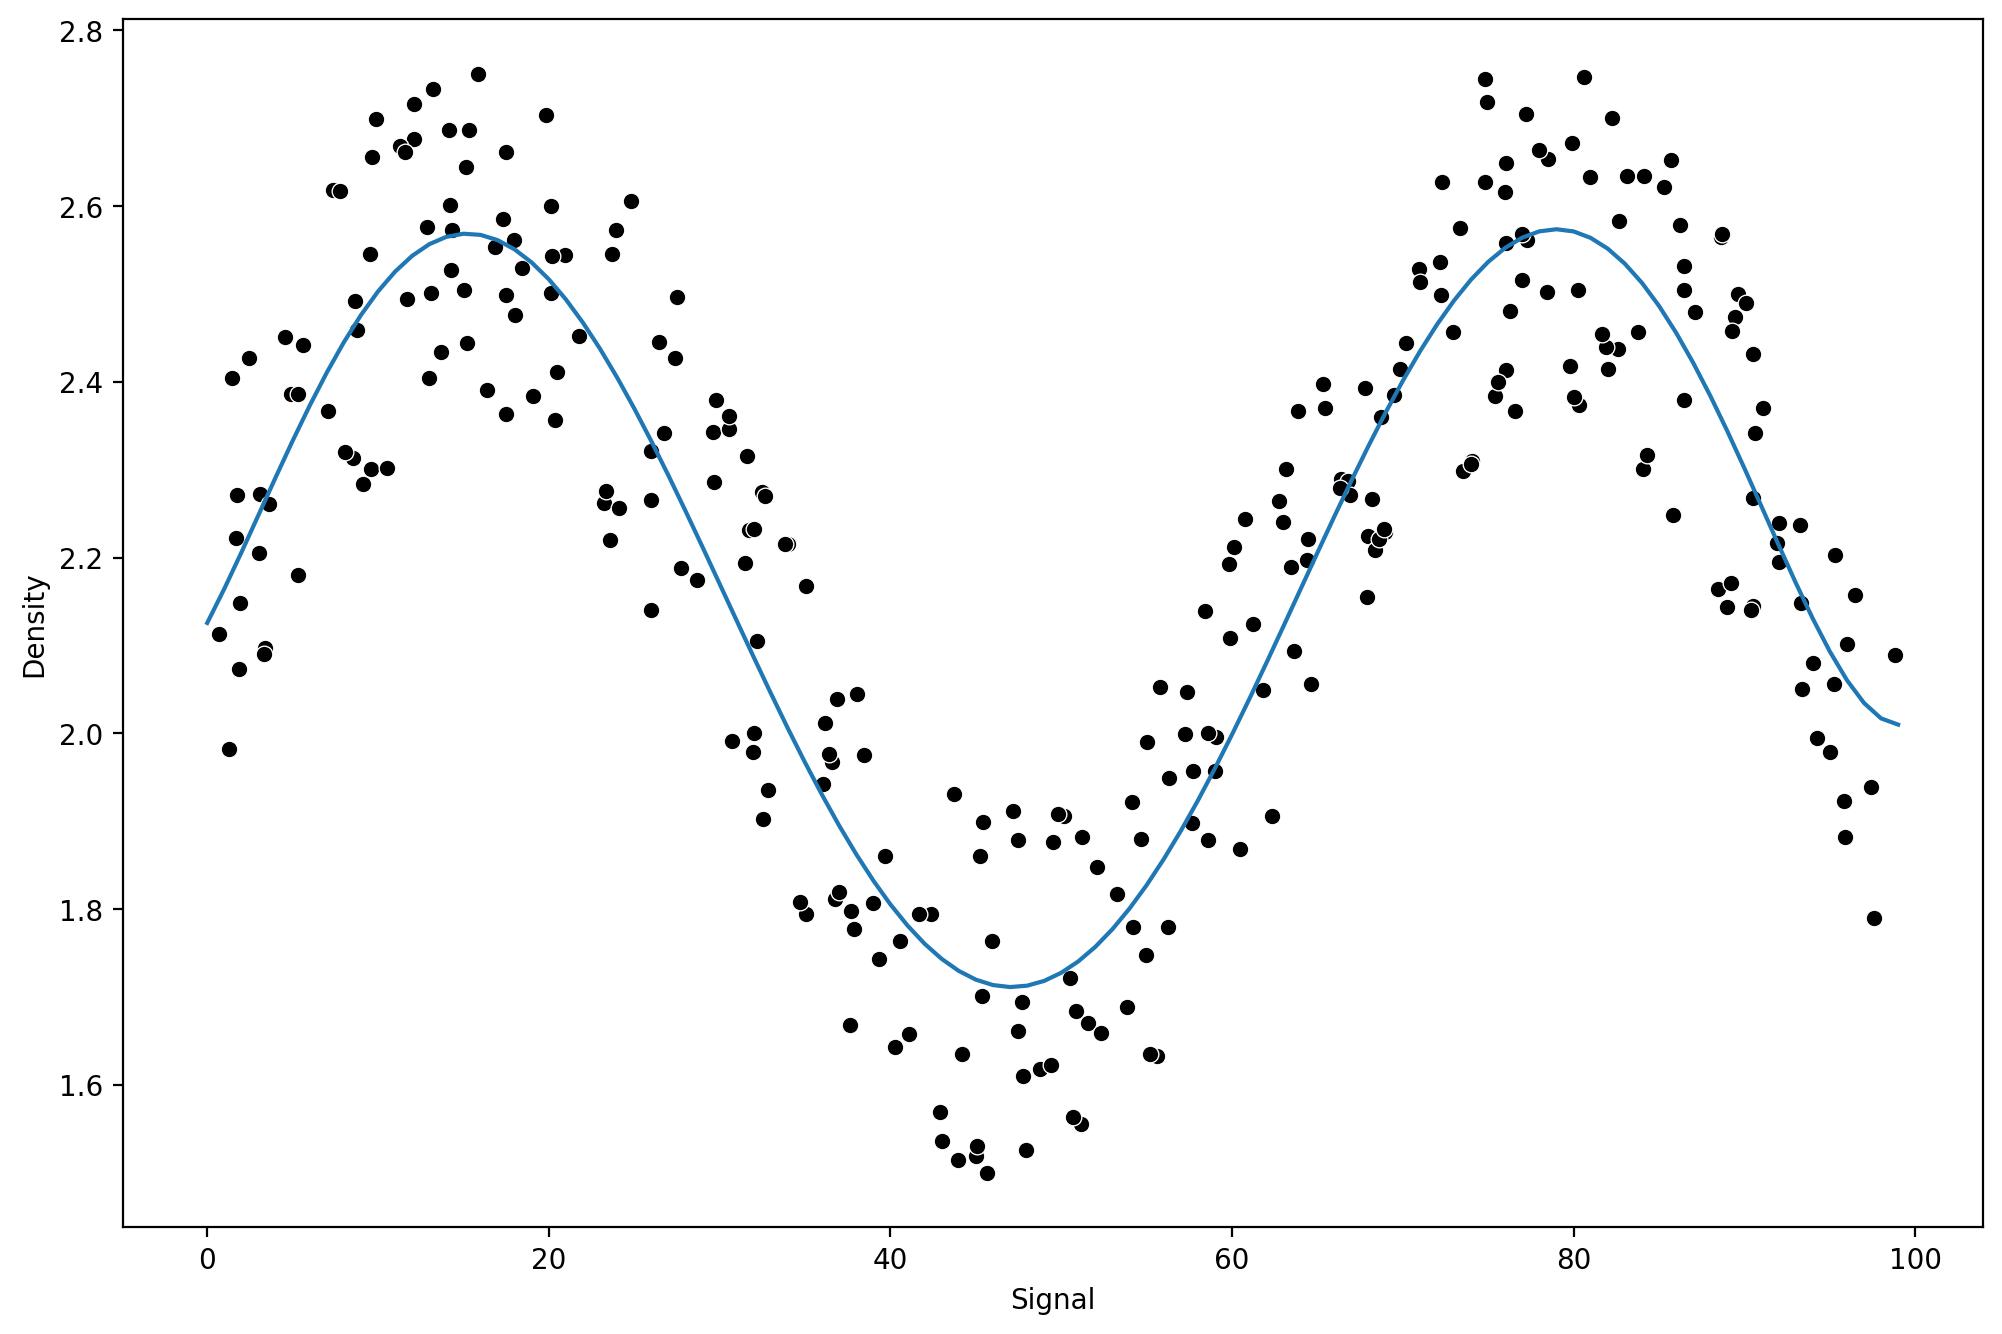

In [38]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [39]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


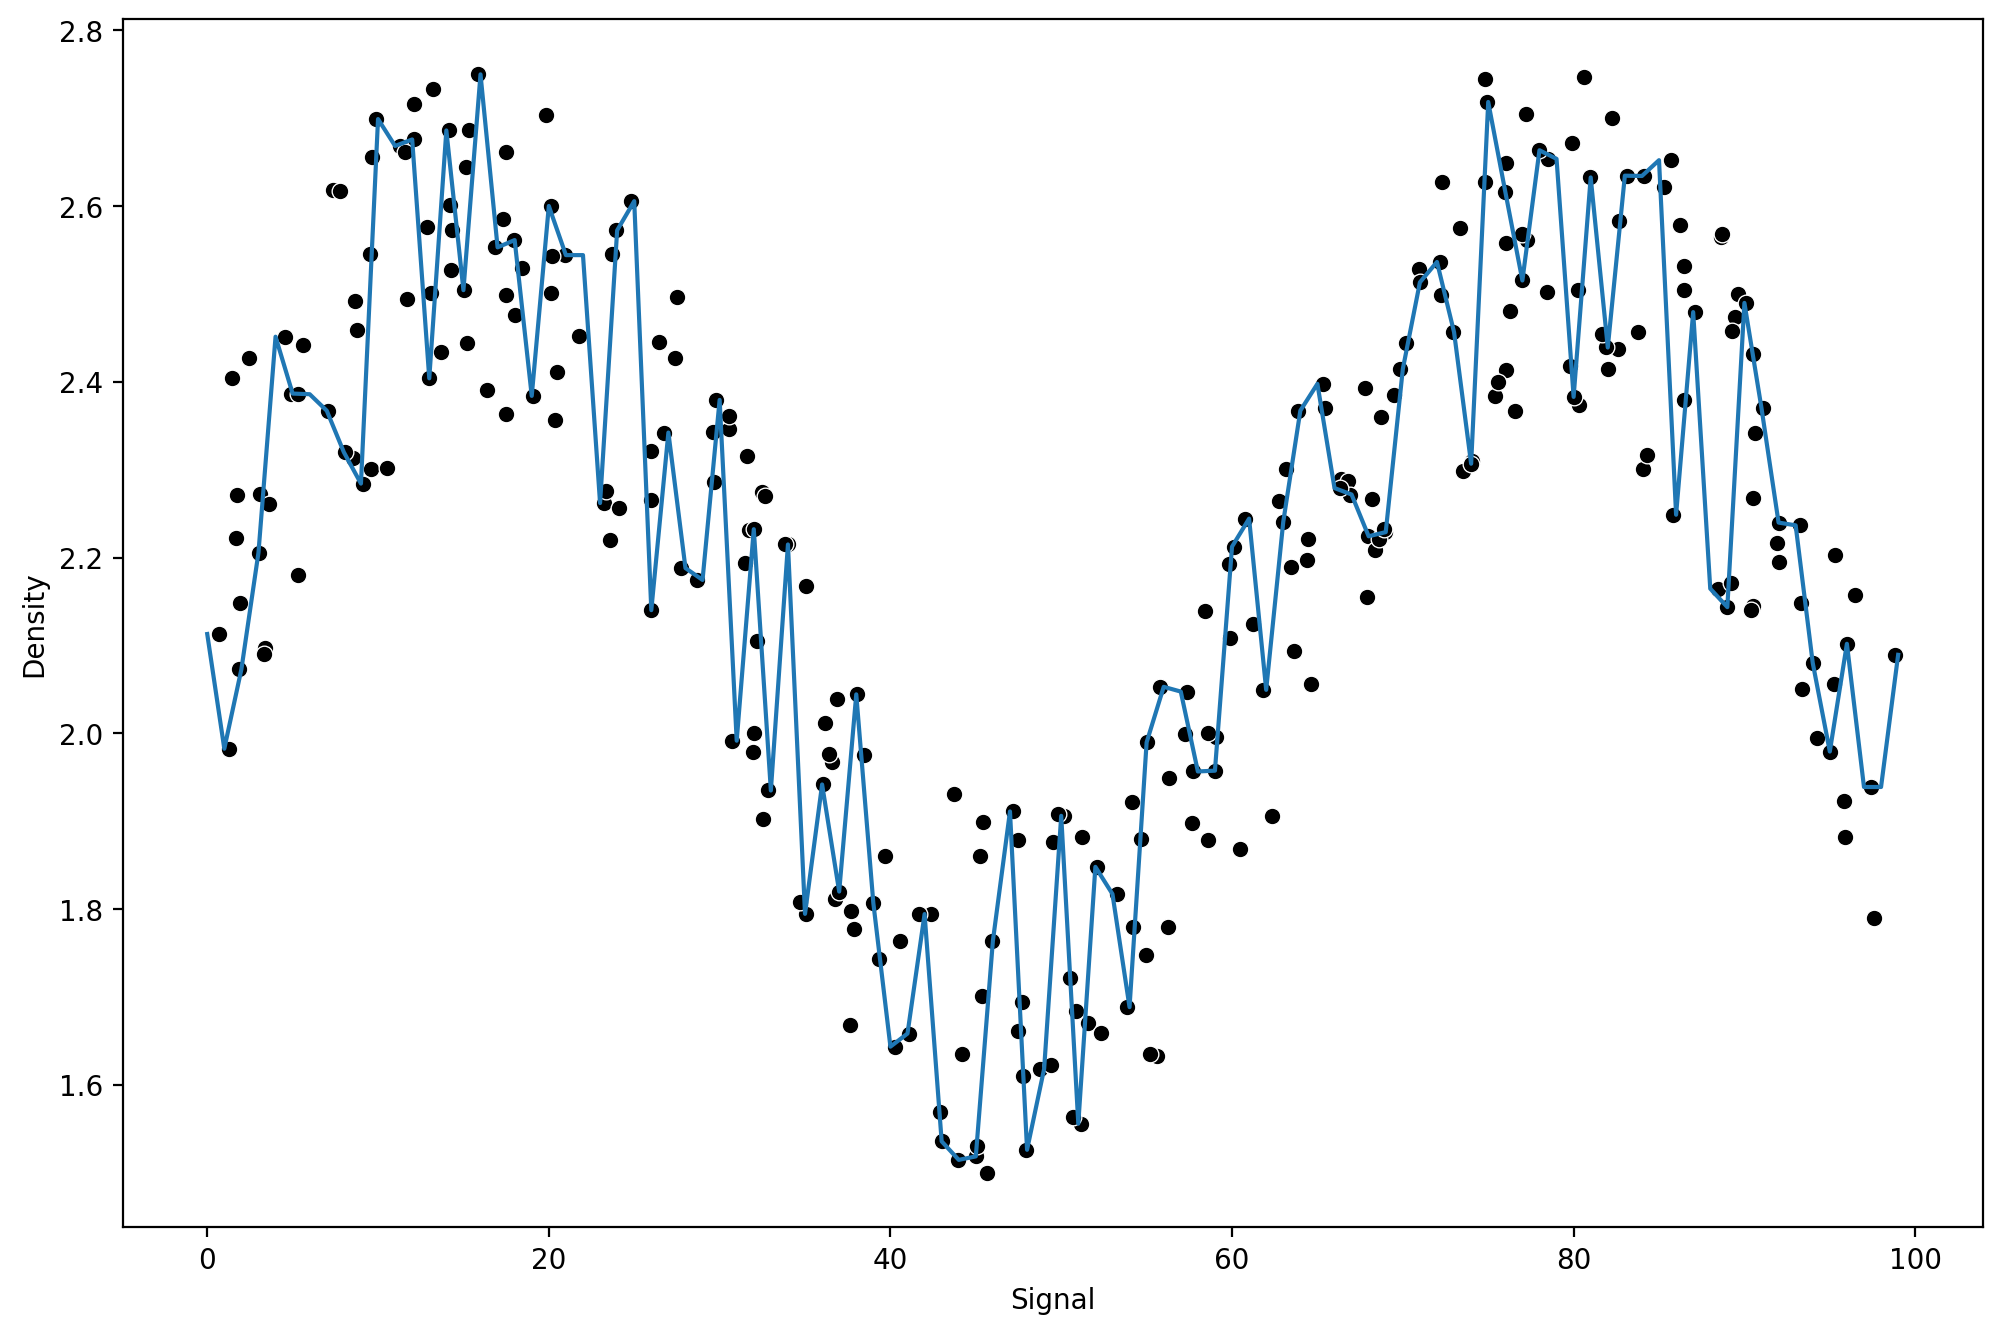

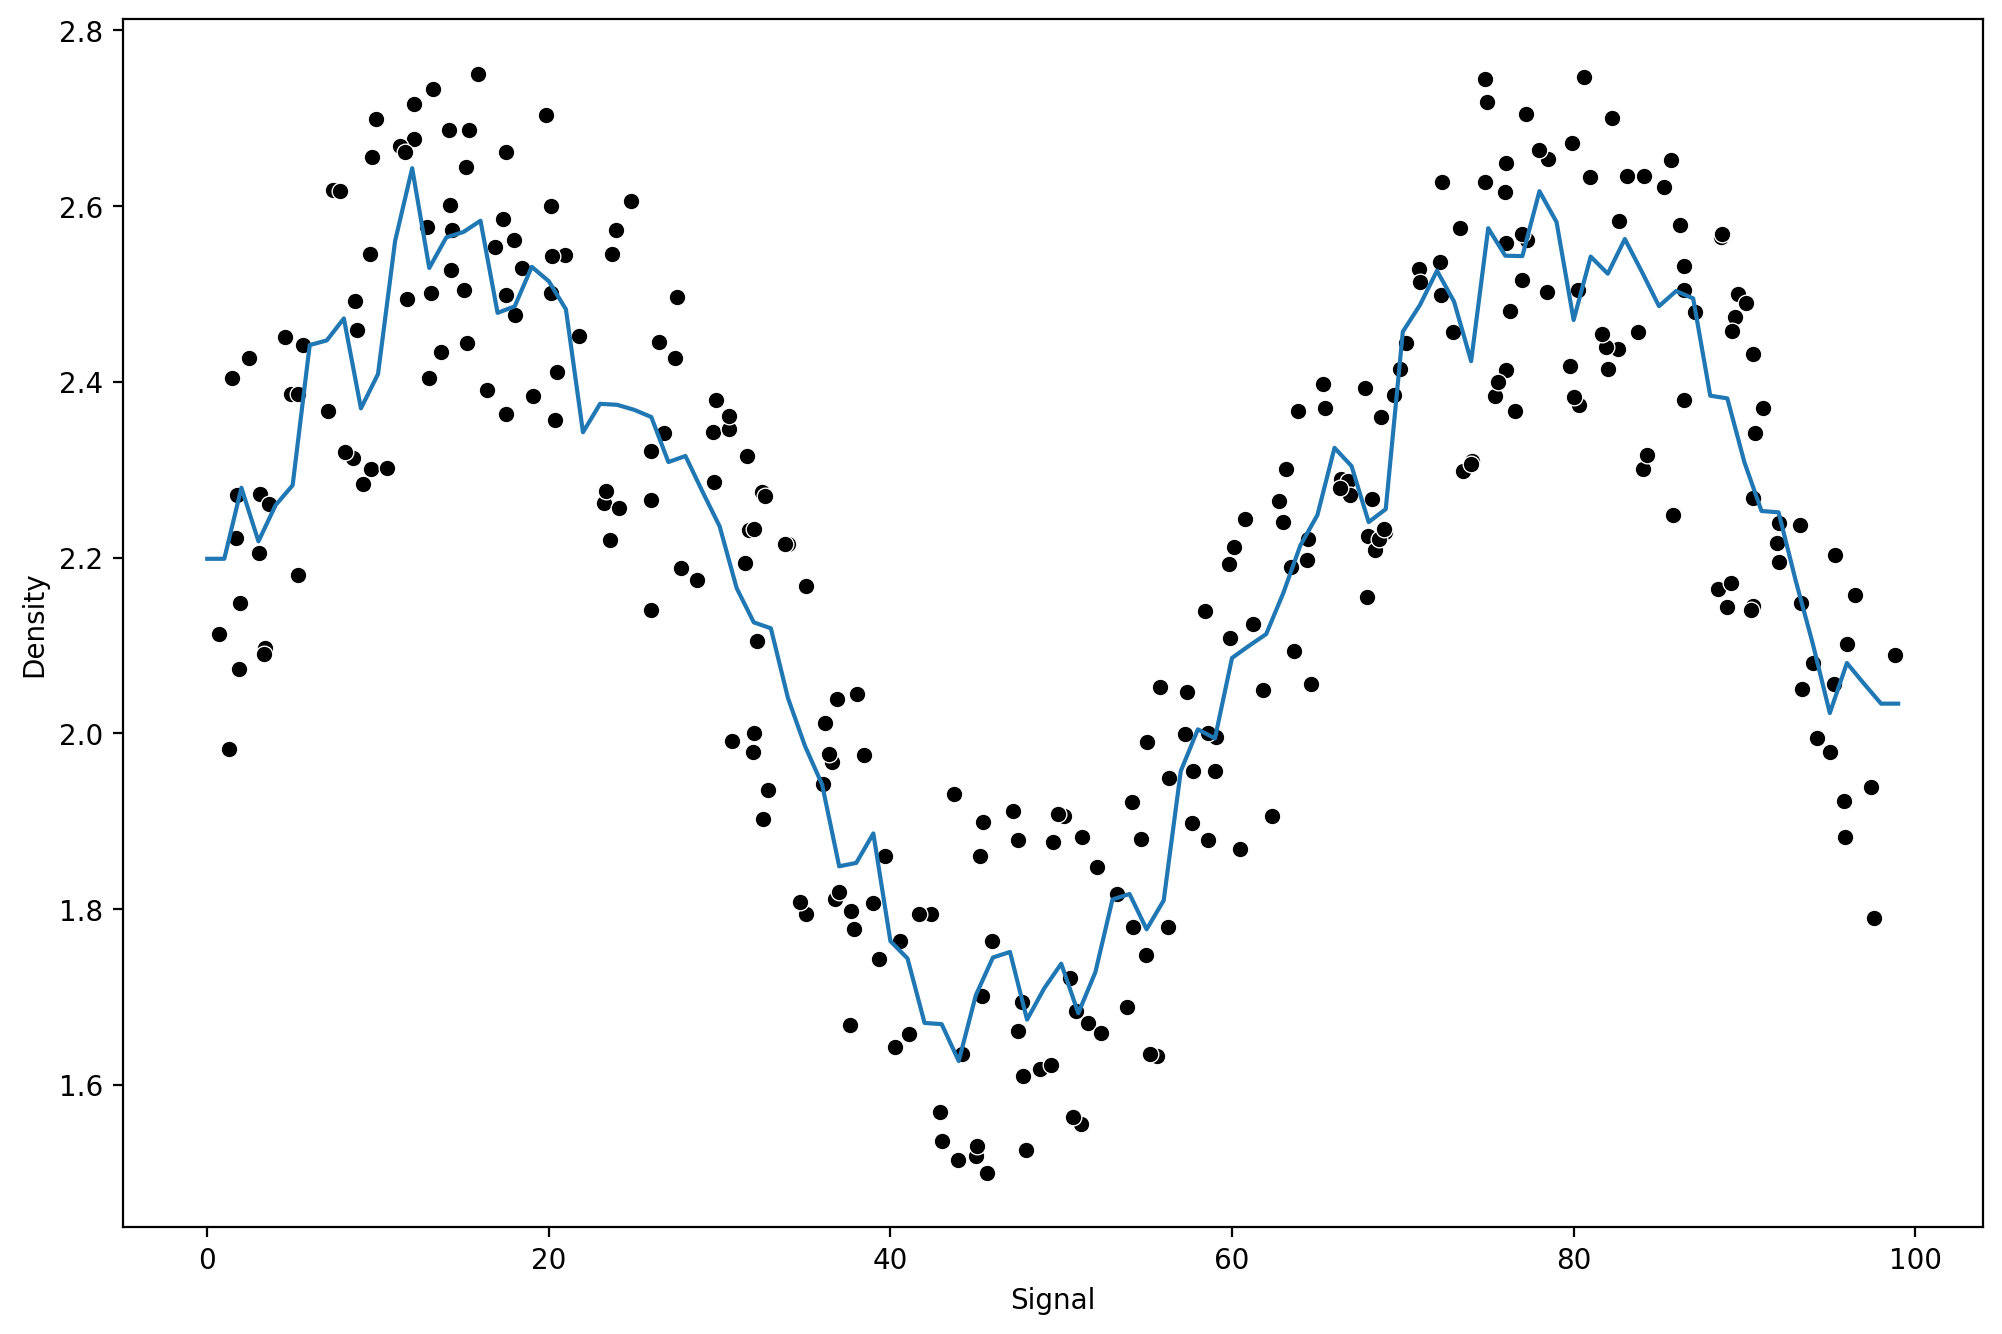

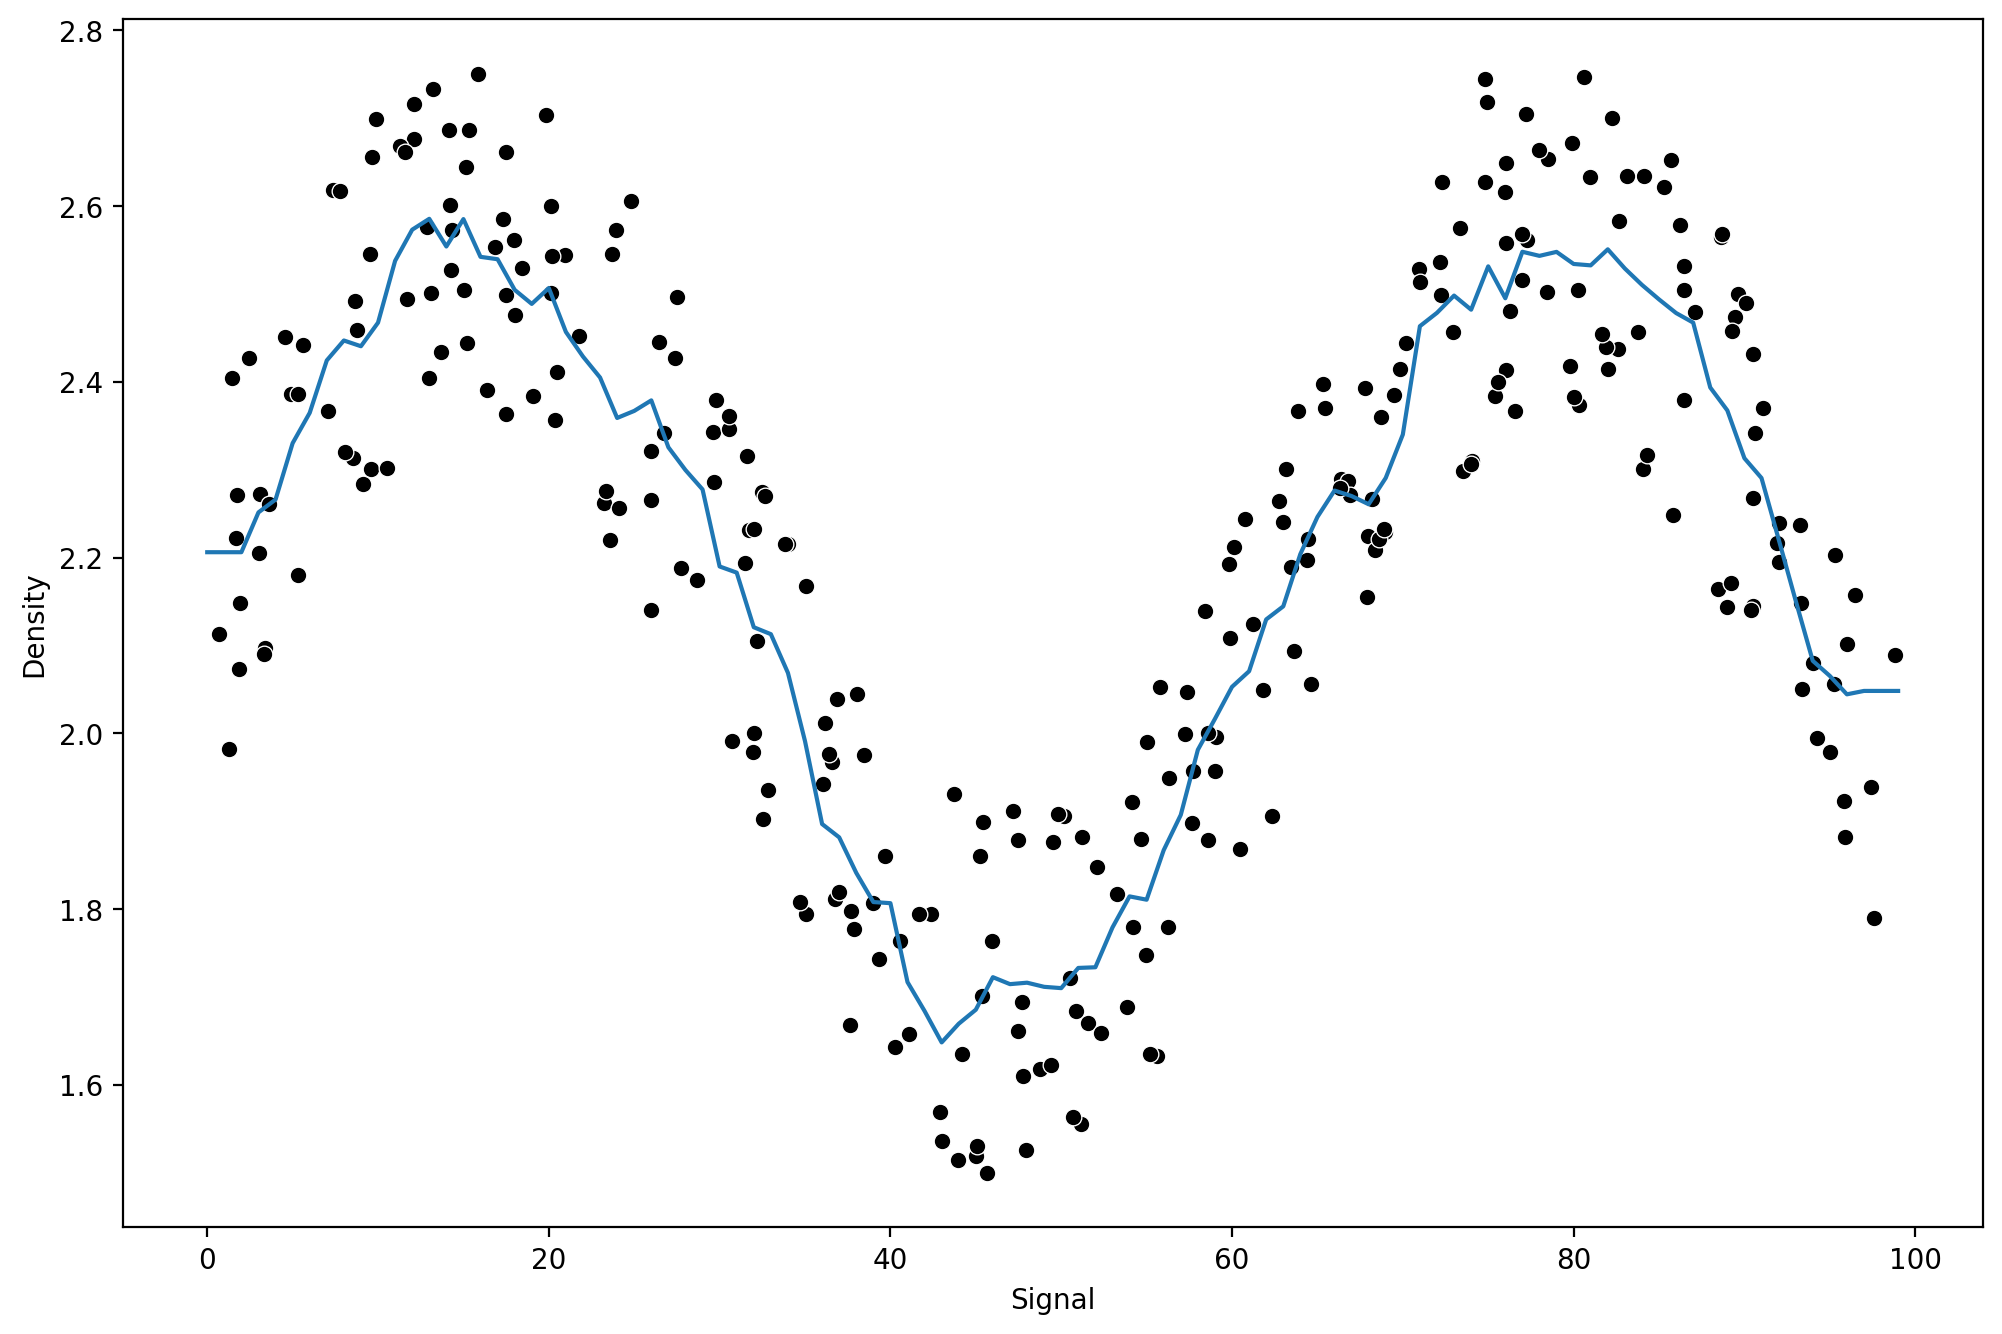

In [41]:
k_values = [1, 5, 10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [42]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


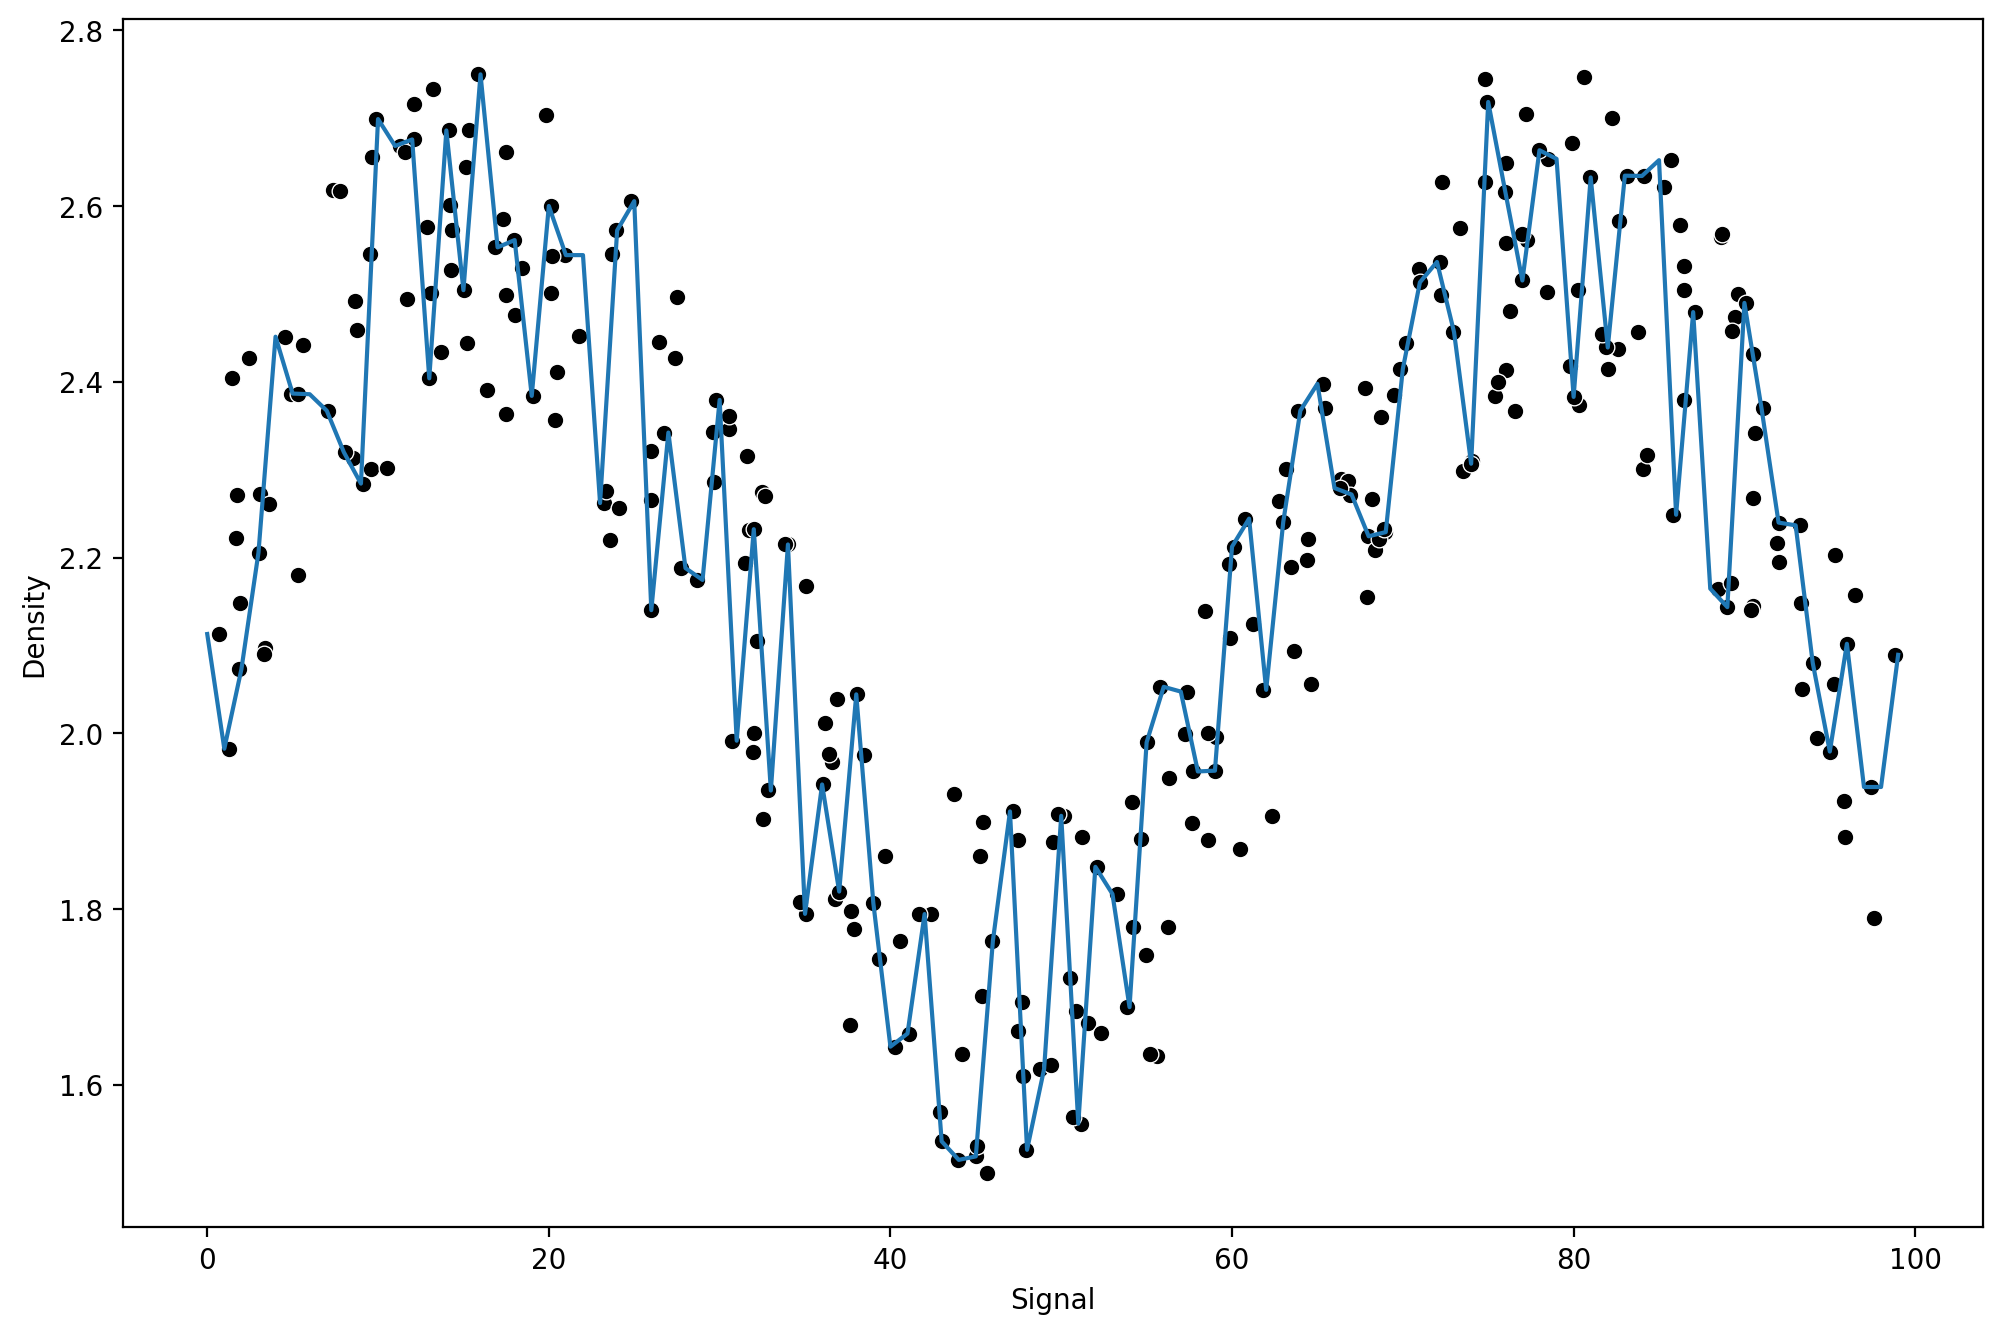

In [43]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [44]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVR

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svr = SVR()

param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 
              'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


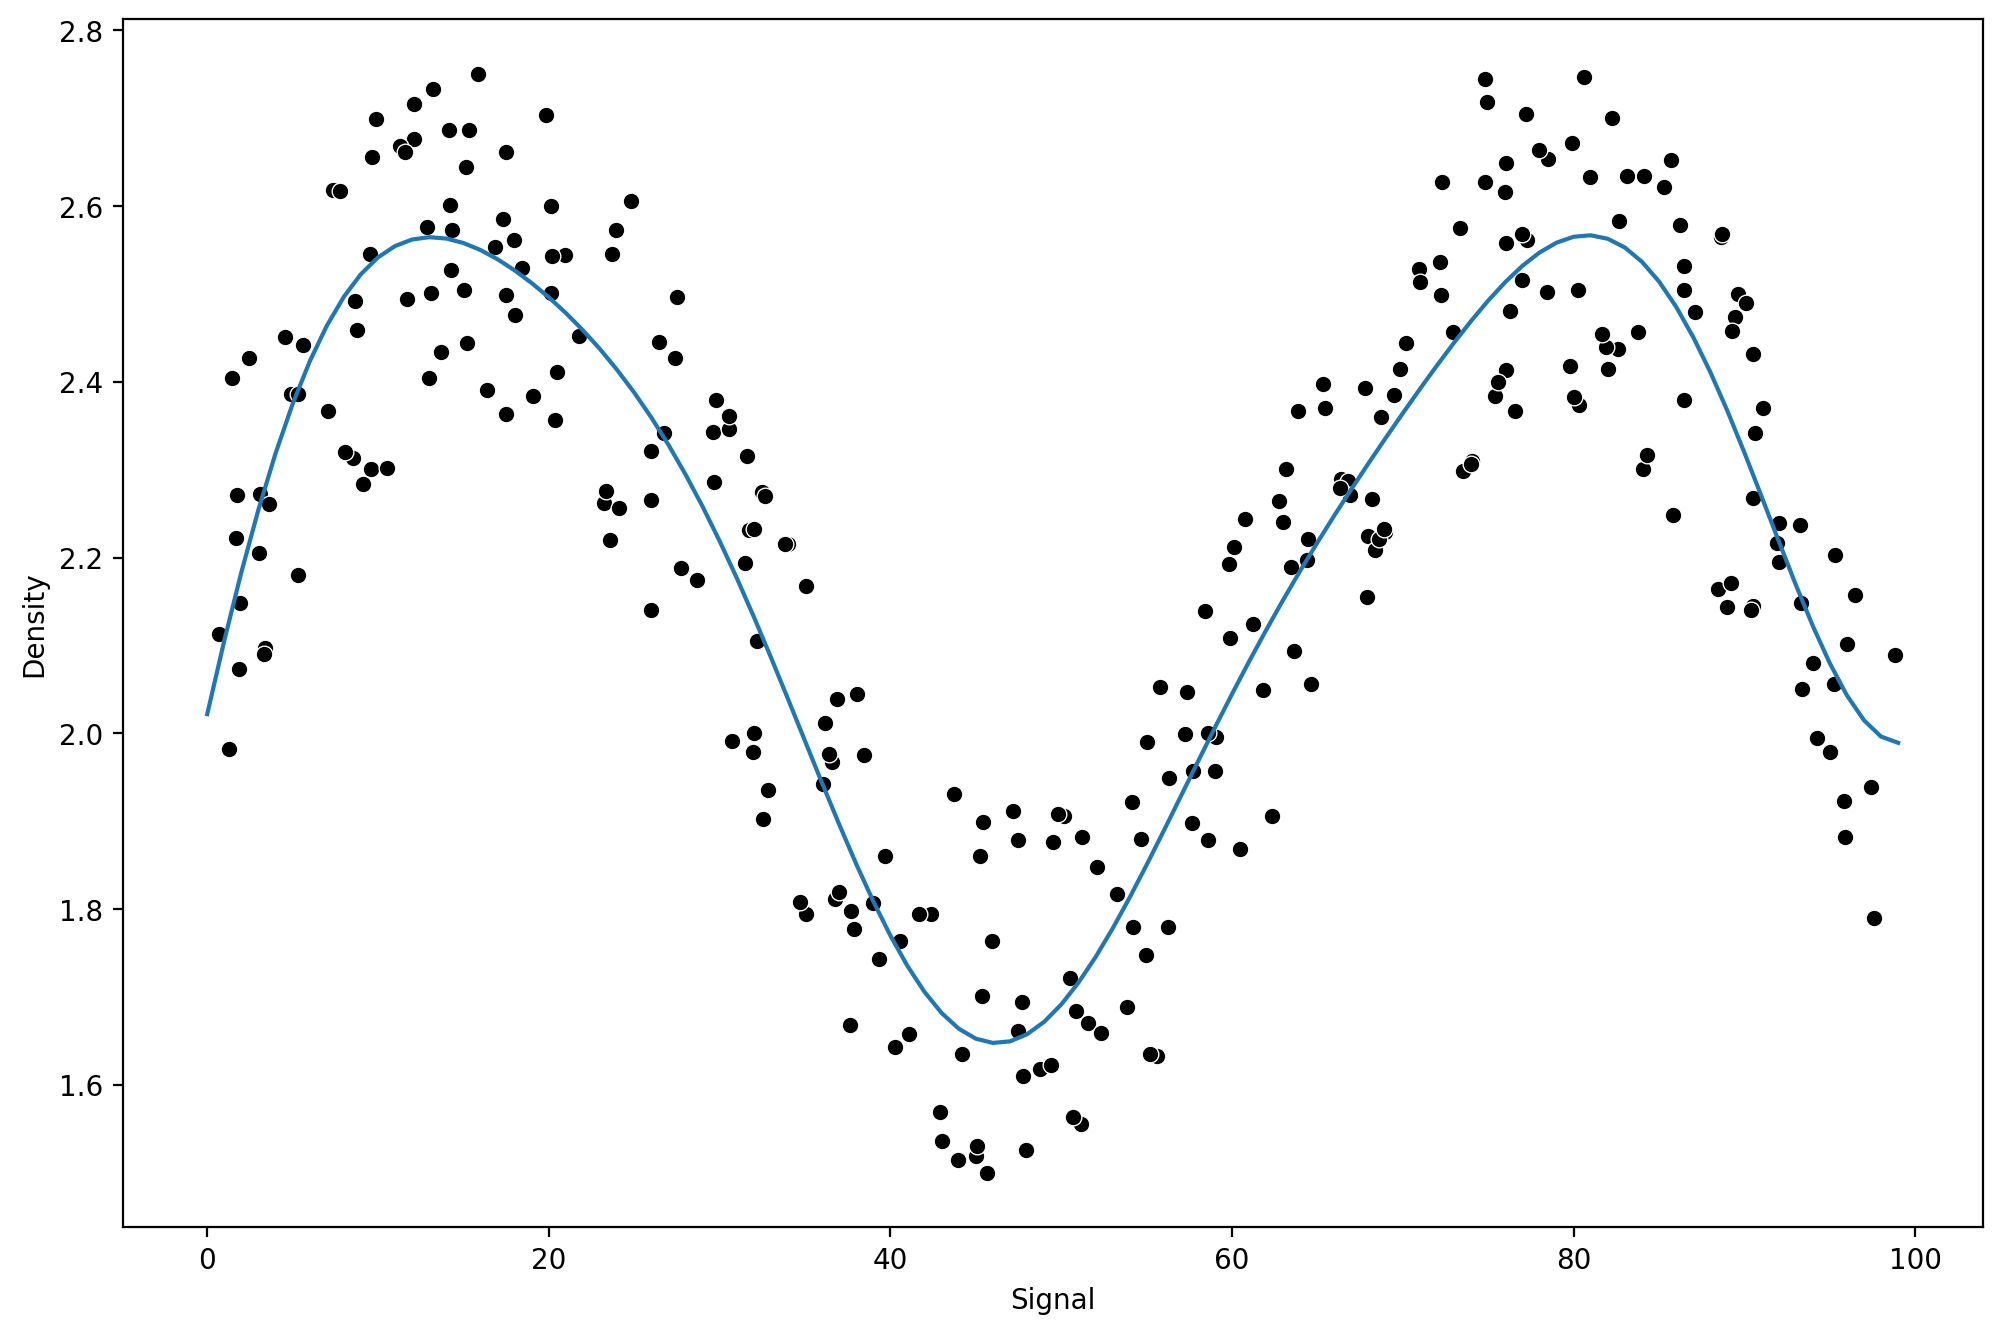

In [47]:
run_model(grid, X_train, y_train, X_test, y_test)

In [48]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor(n_estimators=100)

MAE: 0.1141182708599489
RMSE: 0.13882370466162633


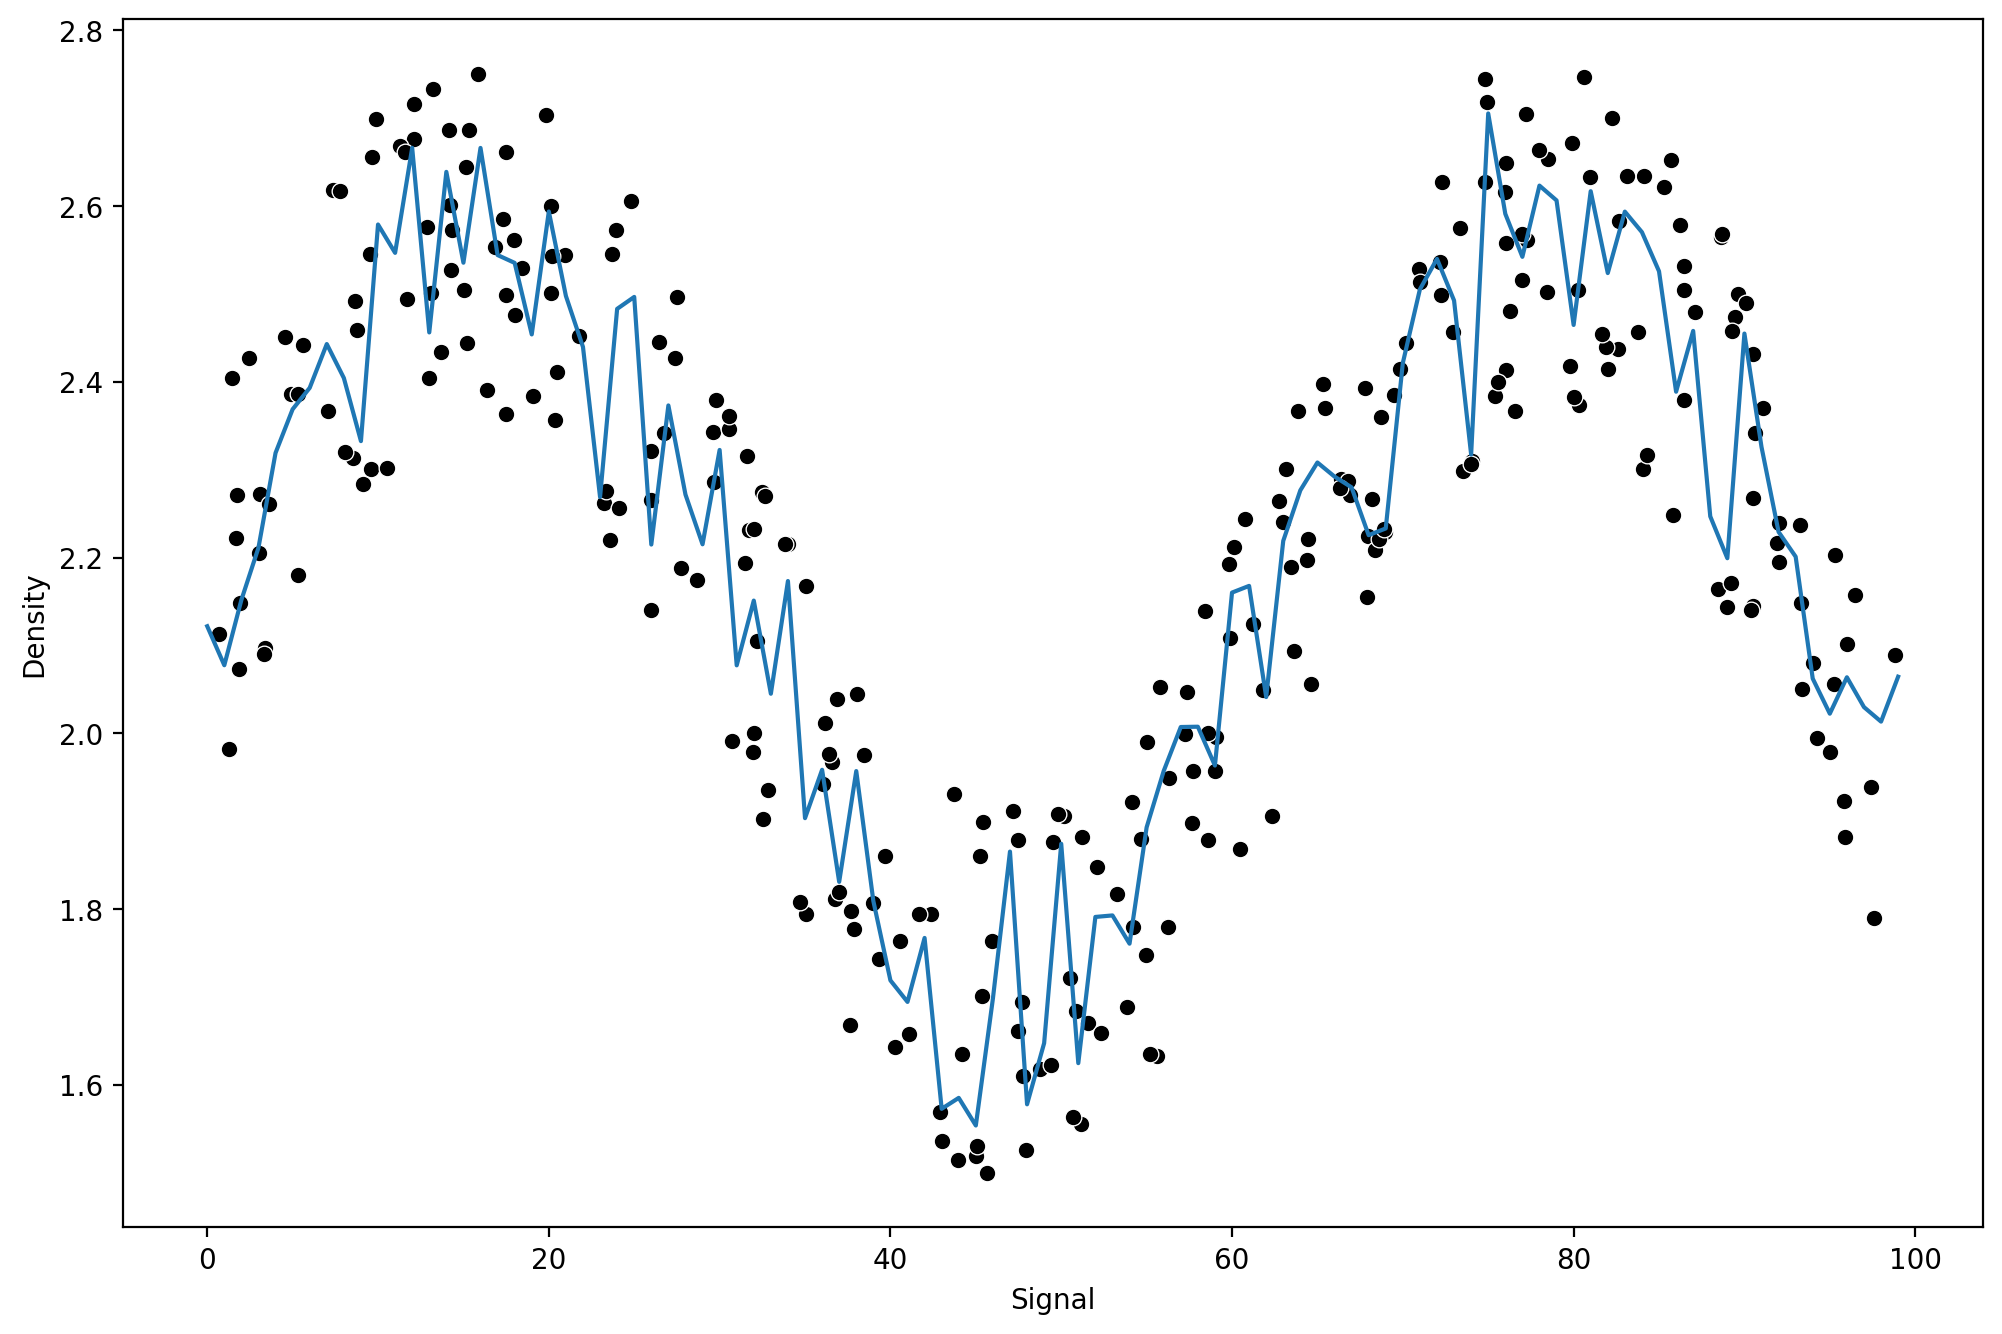

In [52]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [53]:
# BOOSTING
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


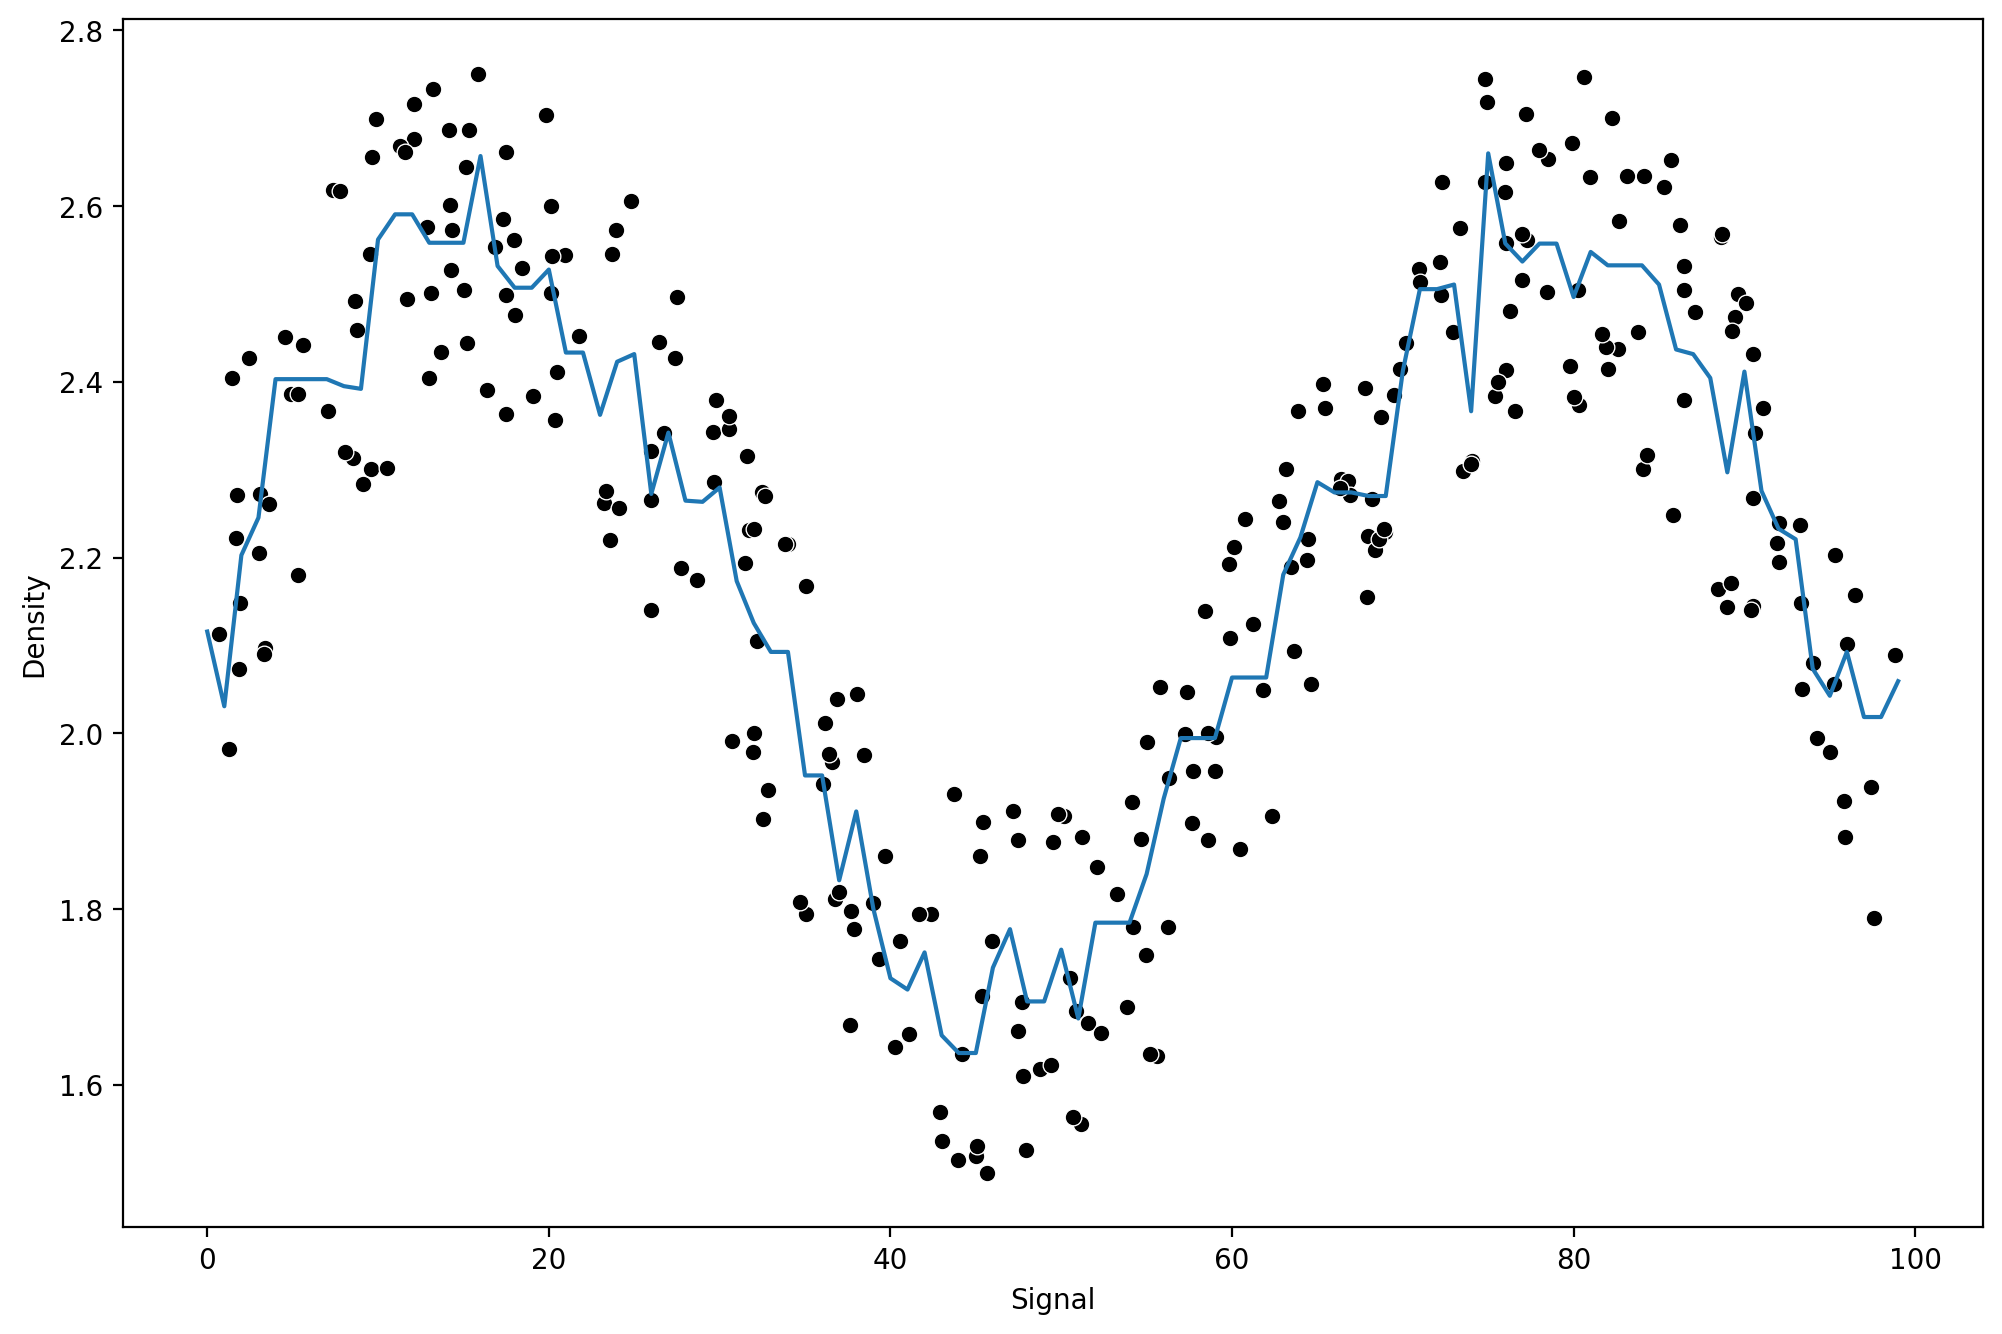

In [54]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.12233122902993533
RMSE: 0.13820319947492707


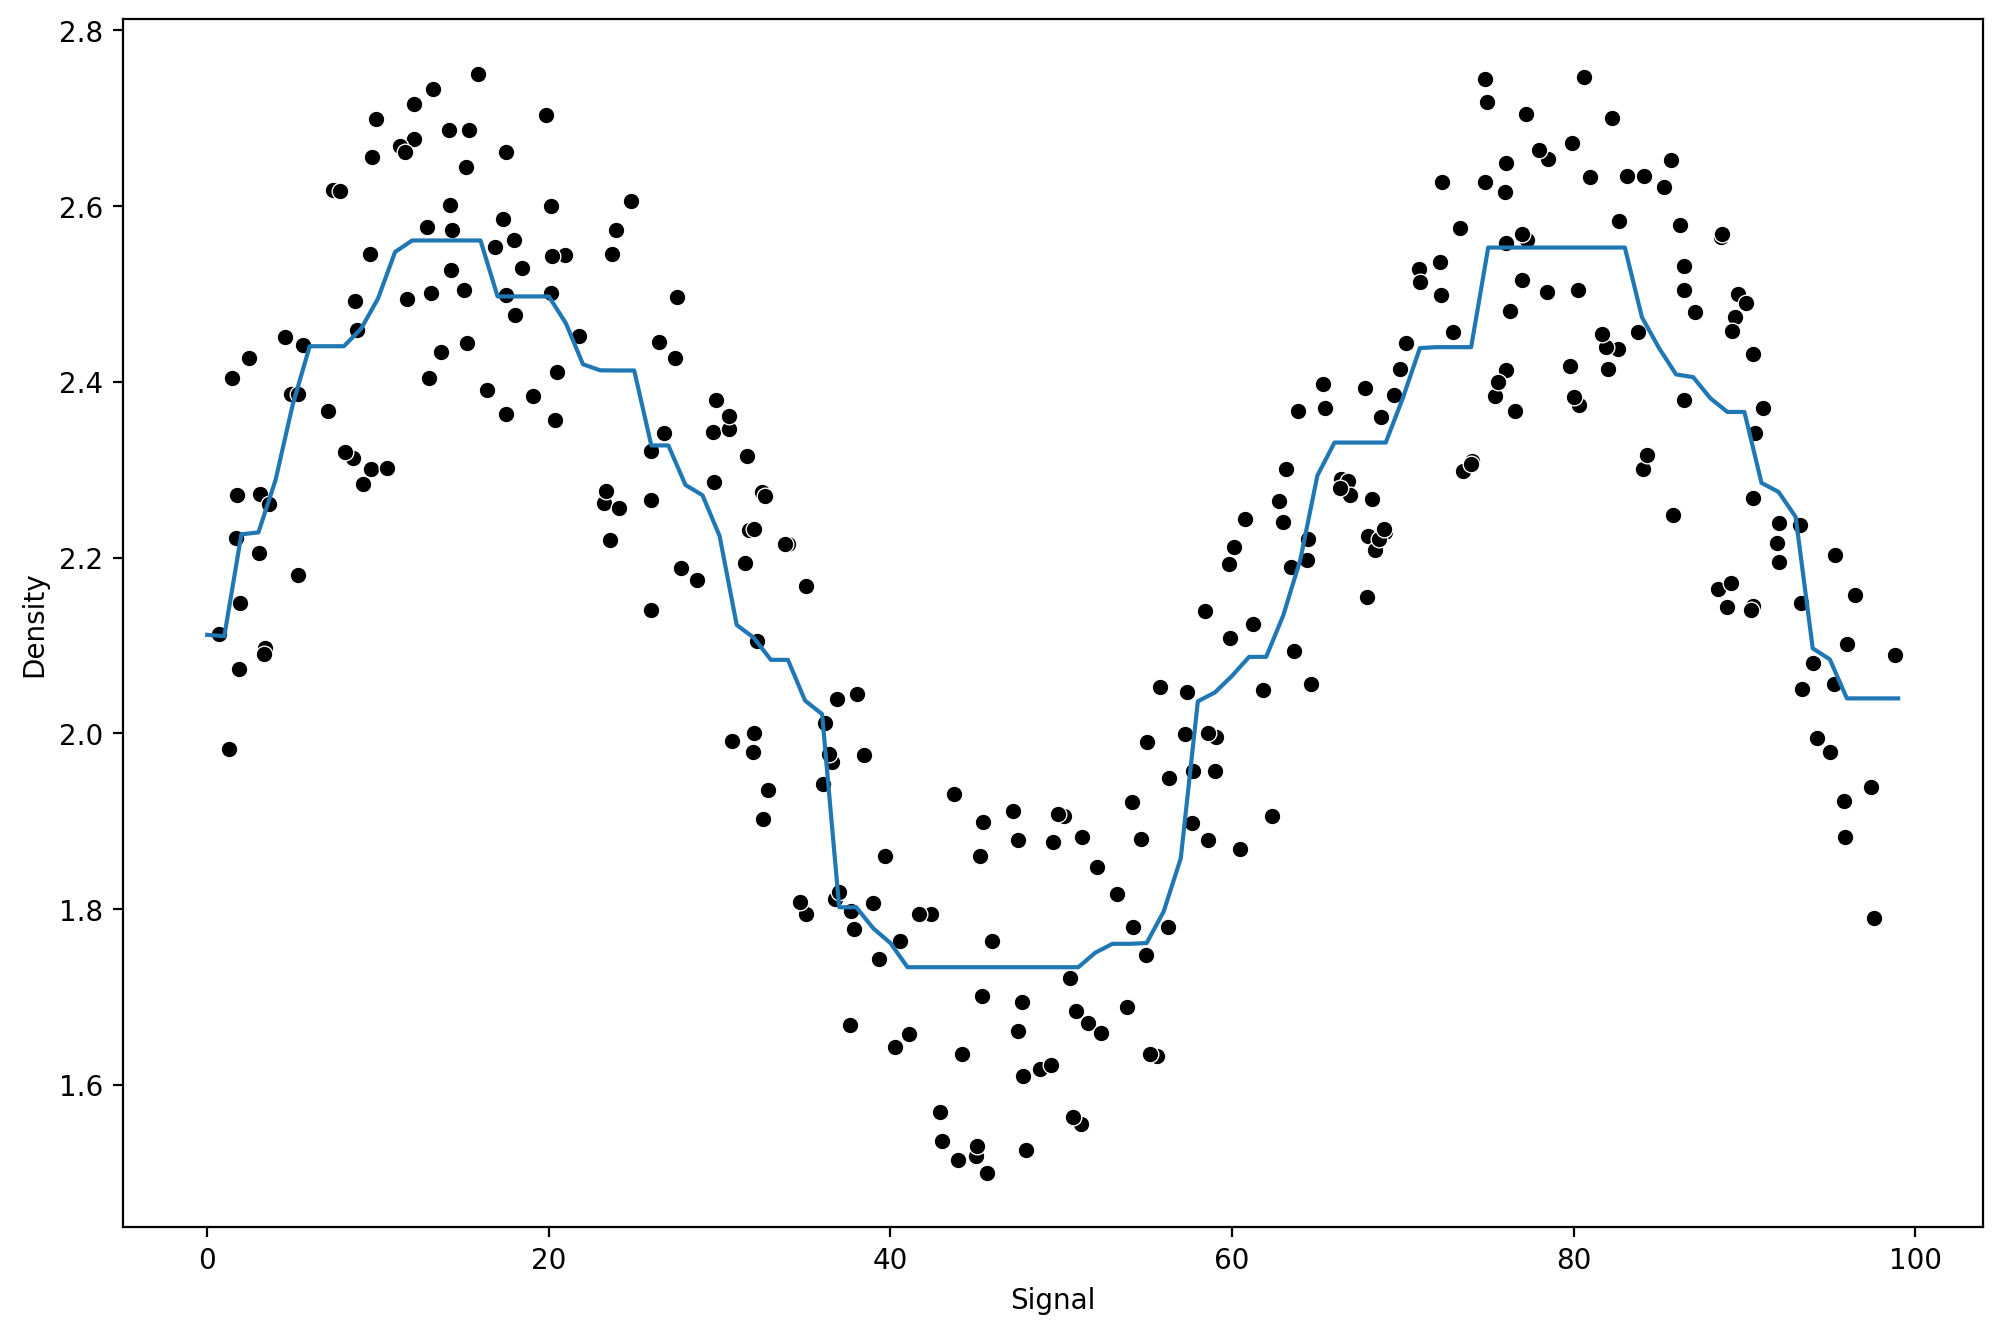

In [55]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)